#### This notebook is for calculating transcriptional neighborhoods. These will be recalculated later. We just need them for making tissue cleanup easier.

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
from sklearn.decomposition import NMF
import glob
from core_functions.initial_neighborhoods import *

In [2]:
data_dir = 'D:/amonell/merscope_final'

Specify the folders of the experiments that you want to calculate neighborhoods for.

In [3]:
input_folders = glob.glob(os.path.join(data_dir, 'SI*'))

## Neighborhood calculations

In [5]:
#We want a high number of neighborhoods at this stage
num_neighborhoods = 15
dfs = []
for input_file in input_folders:
    adata = sc.read(os.path.join(input_file, 'adatas', '02_preprocessed_and_filtered.h5ad'))
    adata.obsm['X_spatial'] = adata.obsm['spatial']
    low_res_binning = 200
    
    spatial_points = np.array([adata.obsm['X_spatial'][:,0], adata.obsm['X_spatial'][:,1]]).T
    binned_points_low, binned_centers_low = create_grid_bins(spatial_points, low_res_binning)
    
    zeros_low = np.zeros(len(spatial_points))
    low_counts = []
    ct = 0
    for binn in range(len(binned_points_low)):
        for k in range(len(binned_points_low[binn])):
            zeros_low[binned_points_low[binn][k]] = ct
            low_counts.append(ct)
            ct += 1
            
    adata_bin30 = create_binned_data(adata, zeros_low, binned_centers_low, low_counts)


    X = pd.DataFrame(adata_bin30.X)
    dfs.append(X)

  0%|          | 0/689785 [00:00<?, ?it/s]

  0%|          | 0/40000 [00:00<?, ?it/s]

C:\Users\amonell\anaconda3_2\envs\timecourse_env_01\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\amonell\anaconda3_2\envs\timecourse_env_01\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\amonell\anaconda3_2\envs\timecourse_env_01\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


  0%|          | 0/745471 [00:00<?, ?it/s]

  0%|          | 0/40000 [00:00<?, ?it/s]

C:\Users\amonell\anaconda3_2\envs\timecourse_env_01\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\amonell\anaconda3_2\envs\timecourse_env_01\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\amonell\anaconda3_2\envs\timecourse_env_01\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


  0%|          | 0/420800 [00:00<?, ?it/s]

  0%|          | 0/40000 [00:00<?, ?it/s]

C:\Users\amonell\anaconda3_2\envs\timecourse_env_01\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\amonell\anaconda3_2\envs\timecourse_env_01\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\amonell\anaconda3_2\envs\timecourse_env_01\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


  0%|          | 0/376969 [00:00<?, ?it/s]

  0%|          | 0/40000 [00:00<?, ?it/s]

C:\Users\amonell\anaconda3_2\envs\timecourse_env_01\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\amonell\anaconda3_2\envs\timecourse_env_01\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\amonell\anaconda3_2\envs\timecourse_env_01\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


  0%|          | 0/507567 [00:00<?, ?it/s]

  0%|          | 0/40000 [00:00<?, ?it/s]

C:\Users\amonell\anaconda3_2\envs\timecourse_env_01\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\amonell\anaconda3_2\envs\timecourse_env_01\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\amonell\anaconda3_2\envs\timecourse_env_01\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


  0%|          | 0/435484 [00:00<?, ?it/s]

  0%|          | 0/40000 [00:00<?, ?it/s]

C:\Users\amonell\anaconda3_2\envs\timecourse_env_01\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\amonell\anaconda3_2\envs\timecourse_env_01\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\amonell\anaconda3_2\envs\timecourse_env_01\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [6]:
X = pd.concat(dfs)
f = len(X.columns)
n = len(X.index.tolist())

model = NMF(n_components=num_neighborhoods, random_state=0)#np.where(interp_scores == np.min(interp_scores))[0][0]
W = model.fit_transform(X)
H = model.components_

C:\Users\amonell\anaconda3_2\envs\timecourse_env_01\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [1]:
for input_file in input_folders:
    adata = sc.read(os.path.join(input_file, 'adatas', '02_preprocessed_and_filtered.h5ad'))
    adata.obsm['X_spatial'] = adata.obsm['spatial']
    celltype_cluster = np.array(adata.obs.index.tolist())
    base_dictionary = {}
    for i in np.unique(celltype_cluster):
        base_dictionary[i] = 0
    nneighbors = 10
    list_of_arrays = []
    spatial_points = np.array([adata.obsm['X_spatial'][:,0], adata.obsm['X_spatial'][:,1]]).T
    tree = KDTree(spatial_points)
    for i_bac in tqdm(range(len(celltype_cluster))):
        current_cell = celltype_cluster[i_bac]
        distances, neighbors = tree.query(spatial_points[i_bac], k=nneighbors)
        neighbors = list(neighbors)
        gene_array = np.array(np.sum(adata.X[np.array(neighbors), :], axis=0)).squeeze()
        list_of_arrays.append(gene_array)

    X = pd.DataFrame(np.array(list_of_arrays)).astype(H.dtype)
    W = model.transform(X)

    topics_frame = pd.DataFrame(W)
    topics_frame.columns = ['Topic '+str(i+1) for i in range(len(topics_frame.columns))]
    topics_frame.index = adata.obs.index.tolist()
    def zscore(column):
        return (column - column.mean()) / column.std()
    
    # Apply the z-score function to each column in the dataframe
    topics_frame = topics_frame.apply(zscore)
    adata.obs = pd.concat([adata.obs, topics_frame], axis=1)
    adata.obs['topic'] = pd.Categorical((np.argmax(topics_frame.values, axis = 1)+1).astype(str))

    sc.set_figure_params(dpi=300)
    sc.pl.embedding(adata, basis='spatial', color='topic', vmax=1, cmap='Blues', title='Neighborhood', size=2)

    adata.write(os.path.join(input_file, 'adatas', '03_intial_neighborhoods.h5ad'))

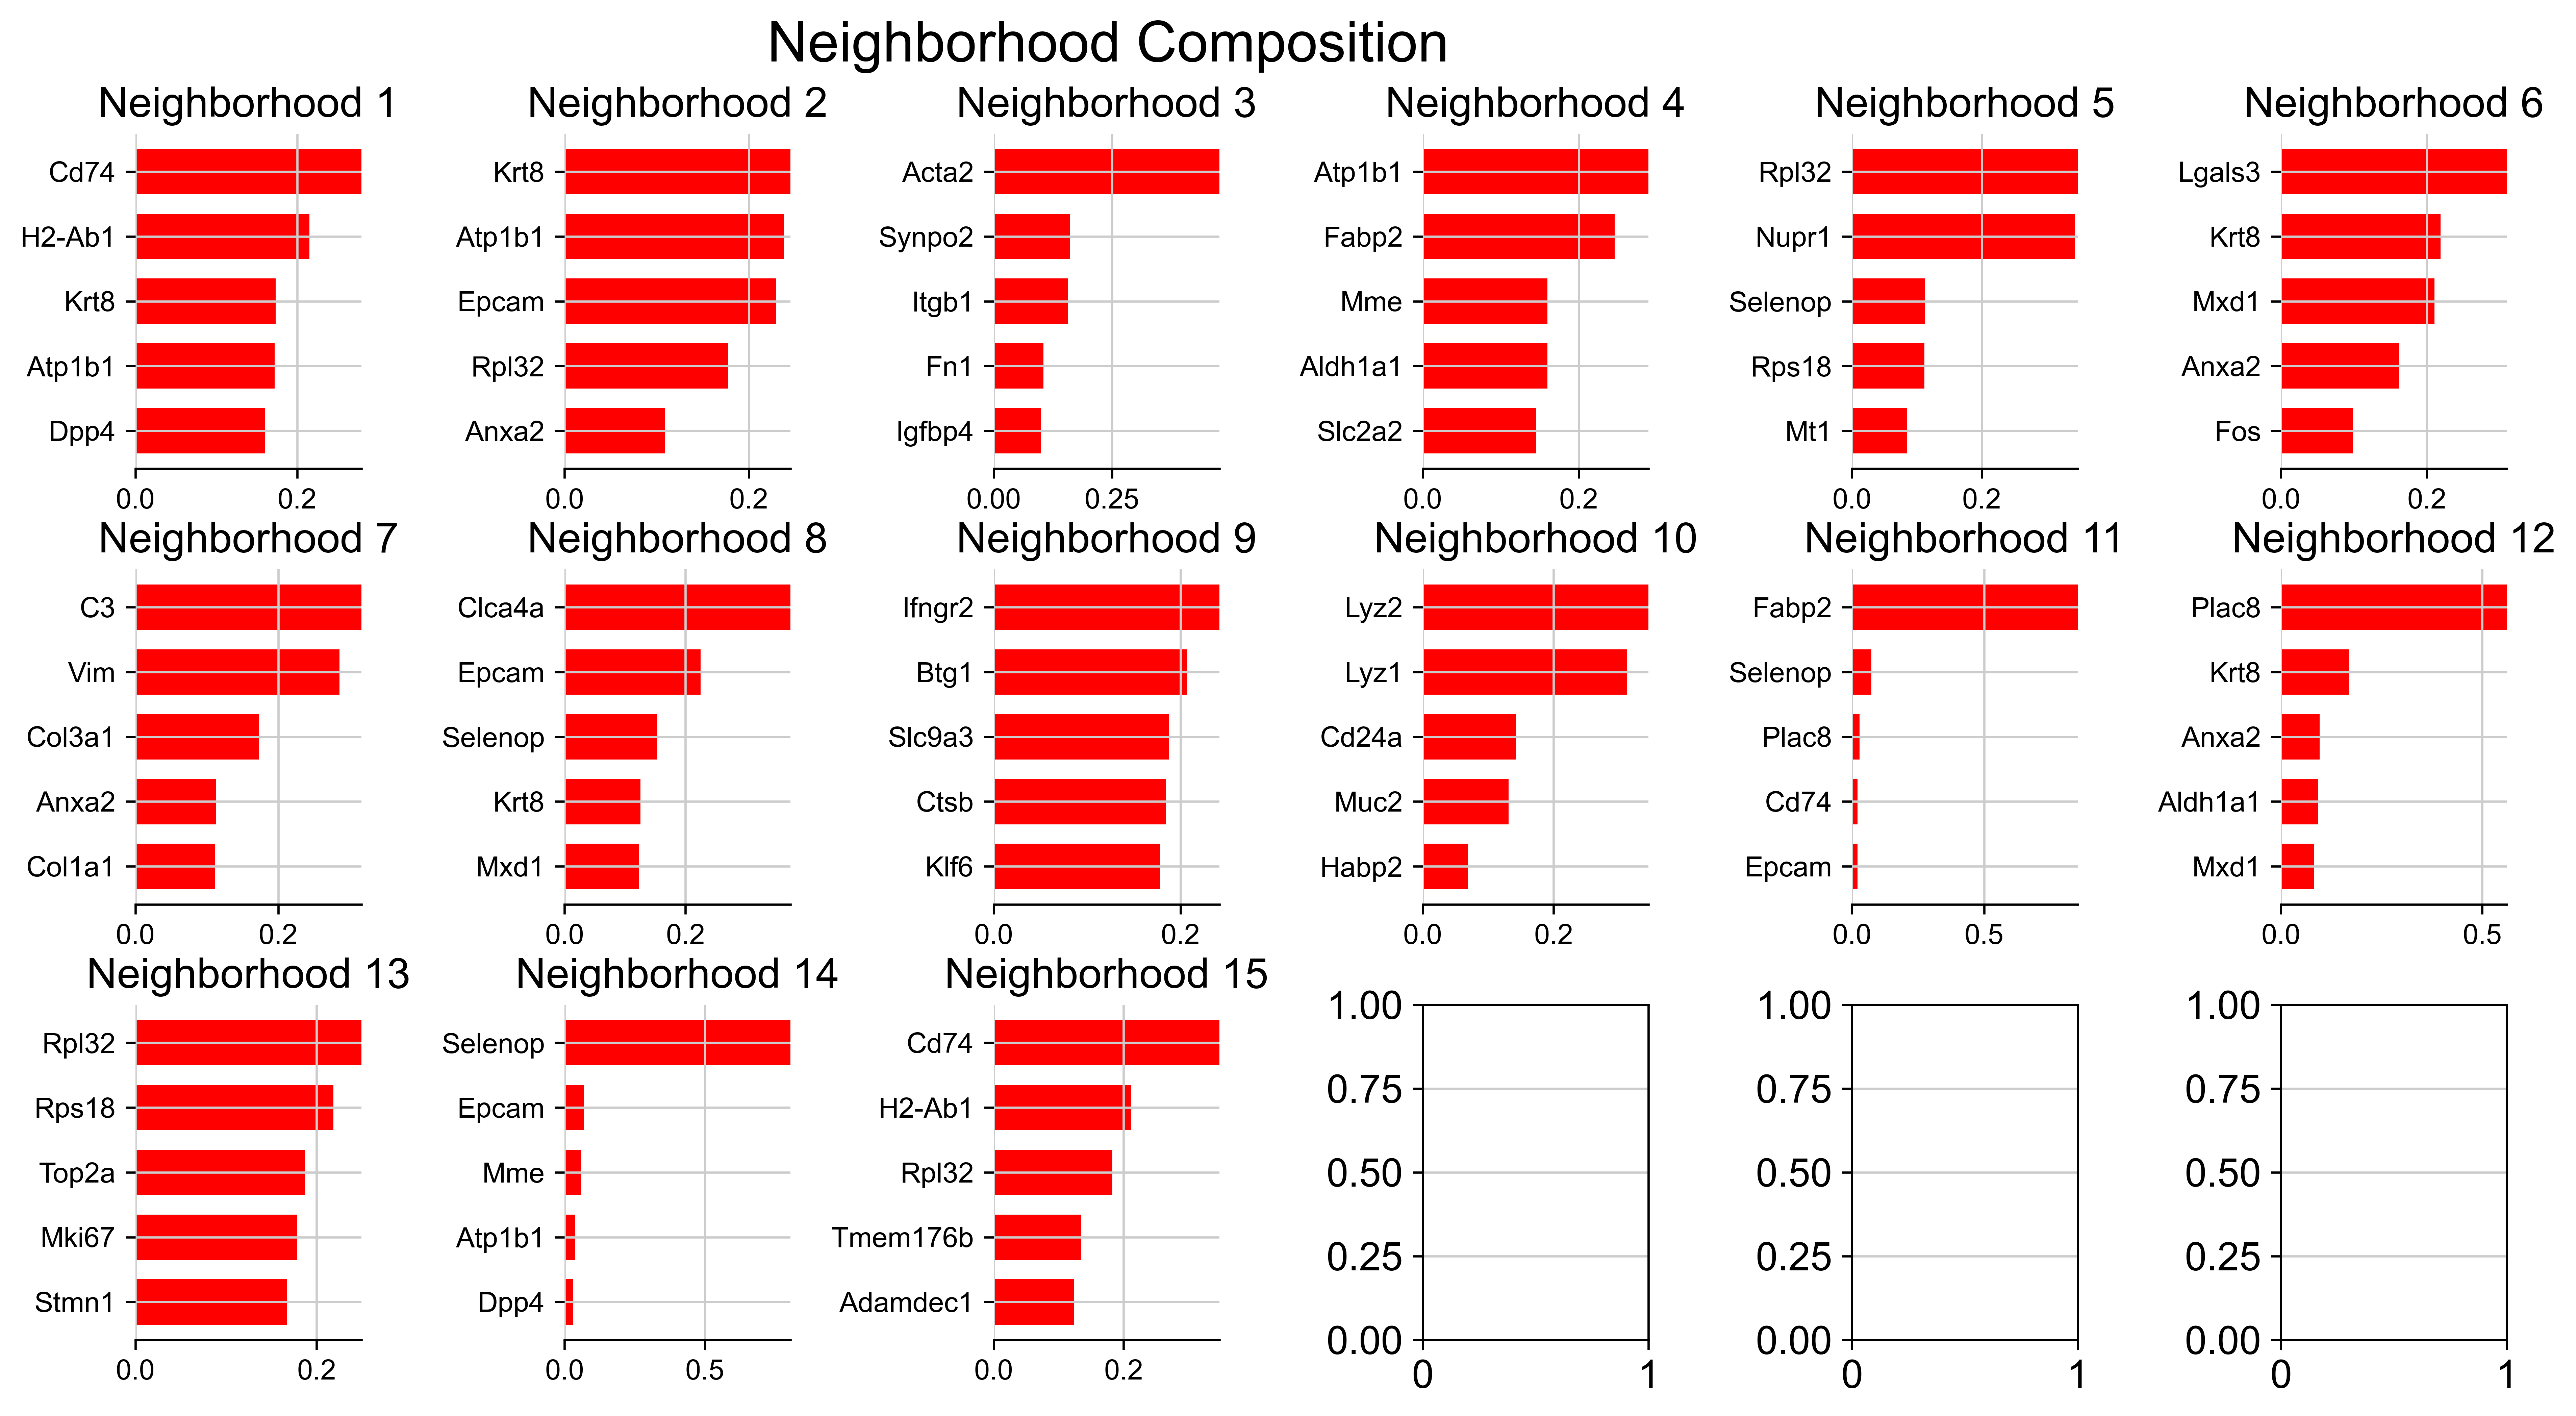

In [7]:
import matplotlib.pyplot as plt
plot_top_words(model, adata.var.index.tolist(), 5, 'Neighborhood Composition')